Final Local Minimum: [0.50174035]


Text(0, 0.5, 'Derivative')

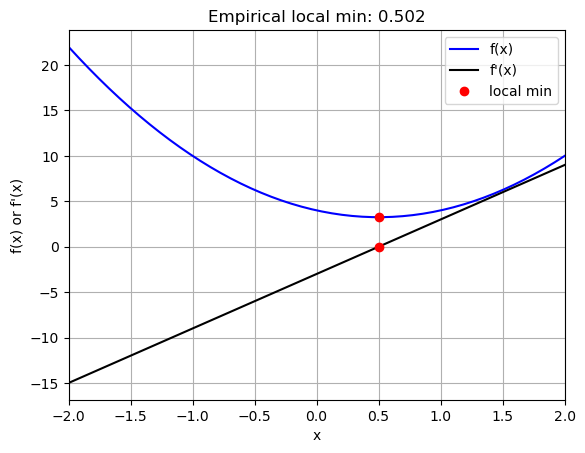

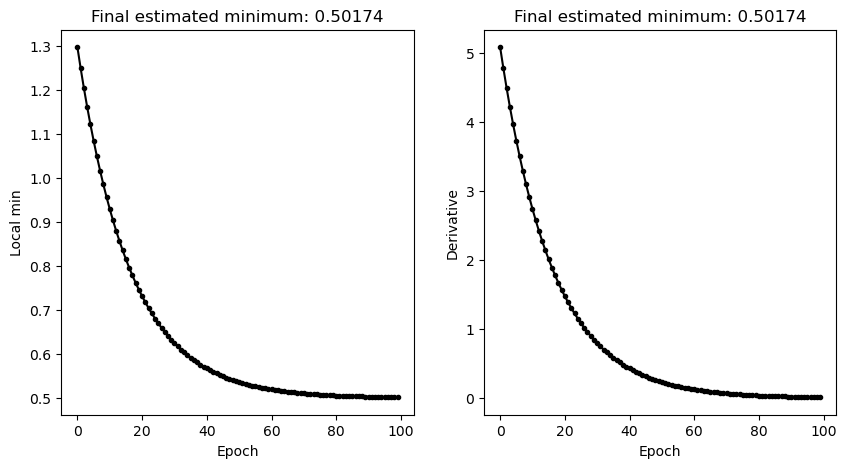

In [1]:
import numdifftools as nd
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3 * x**2 - 3 * x + 4

def calculate_derivative(func, x0, method='central', full_output=False):
    # Calculate the derivative of a function using numdifftools.
    derivative_func = nd.Derivative(func, method=method, full_output=full_output)
    derivative = derivative_func(x0)
    return derivative

# Define the range of x values
x = np.linspace(-2, 2)

# Calculate the derivative of the function in the range of x values
df = calculate_derivative(f, x)

# Random starting point
localmin = np.random.choice(x, 1)

# Gradient descent parameters
learning_rate = .01
training_epoch = 100

# initialize the outputs matrix
modelparams = np.zeros((training_epoch, 2))

# Training
for i in range(training_epoch):
    grad = calculate_derivative(f, localmin)
    localmin -= learning_rate * grad
    modelparams[i, :] = localmin[0], grad[0] # store as a scalar

print("Final Local Minimum:", localmin)

# Plot the function and its derivative
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(localmin, f(localmin), 'ro')

plt.plot(x, calculate_derivative(f, x), 'k', label="f'(x)")
plt.plot(localmin, calculate_derivative(f, localmin), 'ro', label = "local min")

plt.title('Empirical local min: {:.3f}'.format(localmin[0]))
plt.xlabel('x')
plt.ylabel("f(x) or f'(x)")
plt.legend()
plt.grid(True)
plt.xlim(x[0], x[-1])

fig, ax = plt.subplots(1,2,figsize = (10,5))

for i in range(2):
    ax[i].plot(modelparams[:, i], 'k.-')
    ax[i].set_xlabel('Epoch')
    ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')


ax[0].set_ylabel('Local min')
ax[1].set_ylabel('Derivative')

# the goal of derivative is to move towards a derivative of zero